In [1]:
%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# constants
hbar=1.05e-34
m=9.11e-31
eV=1.6e-19
angstrom = 1e-10
# n is the number of points to plot  
n=50
# User inputs
V0=2.5
a=2

In [3]:
def get_eigens(a, V0):
    potential = V0*eV
    g=2*np.pi/(a*angstrom)
    ks=np.linspace(-np.pi/(a*angstrom), np.pi/(a*angstrom),n)
    eigens=np.zeros((5,n))
    for i, k in enumerate(ks):
        central_potential = np.array([
            [hbar**2*(k-2*g)**2/(2*m), potential, 0, 0, 0],
            [potential, hbar**2*(k-g)**2/(2*m),potential,0, 0],
            [0, potential, hbar**2*k**2/(2*m), potential, 0],
            [0, 0, potential, hbar**2*(k+g)**2/(2*m), potential],
            [0, 0, 0, potential, hbar**2*(k+2*g)**2/(2*m)],
        ])
        eigens[:, i] = np.linalg.eig(central_potential)[0]/eV
    return np.sort(eigens,0).T

<IPython.core.display.Javascript object>


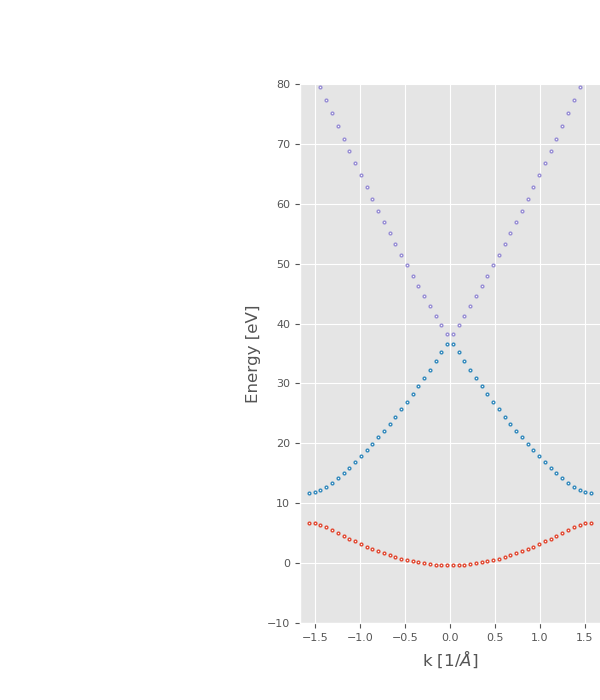

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 7))
plt.subplots_adjust(left=0.5, bottom=None, right=1, top=None, wspace=None, hspace=1.)

ymin = -10
ymax = 80

eigens = get_eigens(a, V0)

line_1, = ax.plot(np.linspace(-np.pi/a, np.pi/a, n), eigens[:, 0], ls='None', marker='o', mfc="white", ms=2)
line_2, = ax.plot(np.linspace(-np.pi/a, np.pi/a, n), eigens[:, 1], ls='None', marker='o', mfc="white", ms=2)
line_3, = ax.plot(np.linspace(-np.pi/a, np.pi/a, n), eigens[:, 2], ls='None', marker='o', mfc="white", ms=2)
line_4, = ax.plot(np.linspace(-np.pi/a, np.pi/a, n), eigens[:, 3], ls='None', marker='o', mfc="white", ms=2)
line_5, = ax.plot(np.linspace(-np.pi/a, np.pi/a, n), eigens[:, 4], ls='None', marker='o', mfc="white", ms=2)

#plot params
ax.set_ylabel('Energy [eV]')
ax.set_xlabel('k [$1/\AA$]')
ax.set_ylim([ymin, ymax])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.get_xticklabels(), fontsize=8)
plt.setp(ax.get_yticklabels(), fontsize=8)

#Define plot updater
def update(a, V0):
    new_eigens = get_eigens(a, V0)
    
    line_1.set_data(np.linspace(-np.pi/a, np.pi/a, n), new_eigens[:, 0])
    line_2.set_data(np.linspace(-np.pi/a, np.pi/a, n), new_eigens[:, 1])
    line_3.set_data(np.linspace(-np.pi/a, np.pi/a, n), new_eigens[:, 2])
    line_4.set_data(np.linspace(-np.pi/a, np.pi/a, n), new_eigens[:, 3])
    line_5.set_data(np.linspace(-np.pi/a, np.pi/a, n), new_eigens[:, 4])
    
    xmin = -np.pi/a - 0.1
    xmax = np.pi/a + 0.1
    ax.set_xlim([xmin, xmax])
    
    fig.canvas.draw_idle()
    return

#Define control elements
s1=widgets.FloatSlider(
    min=1.,
    max=3.,
    step=0.01,
    value=2,
    layout=Layout(width='500px'),
    description='a [Angstrom]',
    style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=0,
    max=10,
    step=0.01,
    value=2.5,
    layout=Layout(width='500px'),
    description='Potential [eV]',
    style = {'description_width': 'initial'})

#Connect controls to plot
out = interactive_output(update, {'a': s1, 'V0': s2})

#Set layout
Vbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')

#Display output
display(VBox([s1, s2], layout=Vbox_layout))

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')